In [1]:
#!pip install xgboost
#!pip install catboost
#!pip install lightgbm

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split as tts

train_csv=pd.read_csv("../data/outcomes_models/train_mod_numeric.csv")

In [3]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

from xgboost import XGBRegressor as XGBR


from catboost import CatBoostRegressor as CTR


gbr=GBR()
xgbr=XGBR()
ctr=CTR()

In [4]:
X=train_csv.drop(['price'], axis=1)   # separacion X, y

y=train_csv.price  

In [5]:
# Vamos a separar train_csv en 80% datos para train y 20% datos para testear

X_train, X_test, y_train, y_test=tts(X, y)

In [6]:
# boosting

gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [7]:
xgbr.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [8]:
ctr.fit(X_train, y_train, verbose=0)

## Evaluación

In [9]:
from sklearn.metrics import mean_squared_error as mse  # error cuadratico medio

In [10]:
y_pred=gbr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

89.50959811756884

In [11]:
y_pred=xgbr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

97.00018487246462

In [12]:
y_pred=ctr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

79.42151696853315

# Repetimos normalizando

In [13]:
from sklearn.preprocessing import StandardScaler

In [16]:
X=train_csv.drop(['price'], axis=1)   # separacion X, y

y=train_csv.price  

In [17]:
train_csv_norm=pd.DataFrame(StandardScaler().fit_transform(X),  # standardize numeric columns
                      columns=X.columns)

In [18]:
X_train, X_test, y_train, y_test=tts(train_csv_norm, y)

In [19]:
gbr.fit(X_train, y_train)
xgbr.fit(X_train, y_train)
ctr.fit(X_train, y_train, verbose=0)

In [20]:
y_pred=gbr.predict(X_test)

mse(y_test, y_pred, squared=False) 

148.49794736195025

In [21]:
y_pred=xgbr.predict(X_test)

mse(y_test, y_pred, squared=False)

96.911594724913

In [22]:
y_pred=ctr.predict(X_test)

mse(y_test, y_pred, squared=False)

106.62974827505033

In [23]:
y_pred

array([ 91.37747019, 188.85423014, 237.76978018, ...,  62.47237985,
       104.20522625, 130.11912816])

# Quitamos correlaciones


In [27]:
import pylab as plt
import seaborn as sns

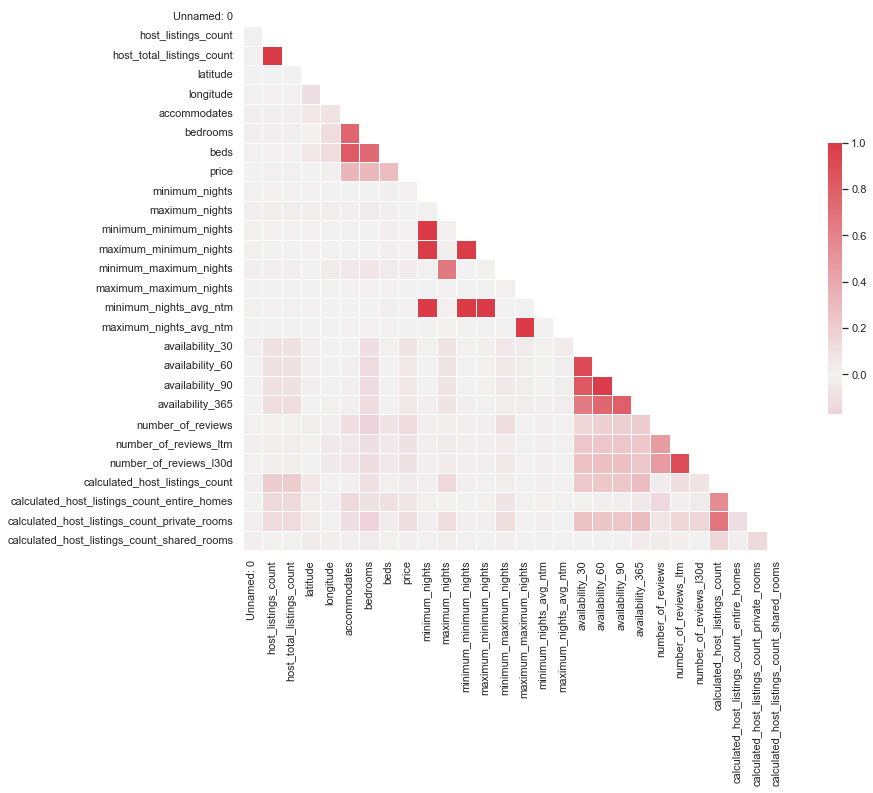

In [28]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(train_csv.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(train_csv.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});


In [31]:
#quitamos las filas con menos correlacion

columns_corr=['minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm']

In [34]:
train_csv_new=train_csv.drop(columns=columns_corr,axis=1)

In [ ]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(train_csv_new.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(train_csv_new.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

# Volvemos a probar

In [58]:
X=train_csv_new.drop(['price'], axis=1)   # separacion X, y

y=train_csv_new.price  

In [59]:
X_train, X_test, y_train, y_test=tts(X, y)

In [60]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [61]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [62]:
ctr.fit(X_train, y_train, verbose=0)

In [63]:
y_pred=gbr.predict(X_test)

mse(y_test, y_pred, squared=False) 

202.68696705118336

In [64]:
y_pred=xgbr.predict(X_test)

mse(y_test, y_pred, squared=False)

213.0604577366655

In [65]:
y_pred=ctr.predict(X_test)

mse(y_test, y_pred, squared=False)

135.68734600752876

## Elegimos modelo

En este punto el modelo que mejor ha funcionado es de los modelos iniciales el ctr con un RMSE de 79